In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os

path = os.listdir('train/')
classes = {'Control':0, 'PD':1}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'train/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1])

In [6]:
pd.Series(Y).value_counts()

0    4359
1    2897
dtype: int64

In [7]:
X.shape, X_updated.shape

((7256, 200, 200), (7256, 40000))

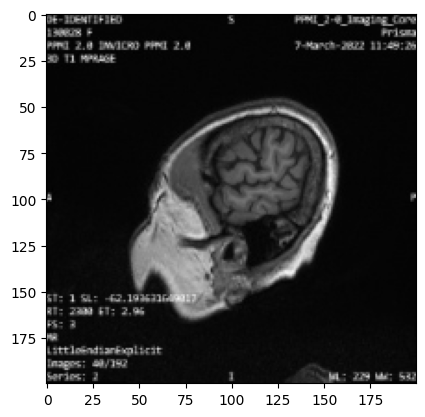

In [35]:
plt.imshow(X[52], cmap='gray')

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(7256, 40000)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((5804, 40000), (1452, 40000))

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [15]:
from sklearn.decomposition import PCA

In [16]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(5804, 40000) (1452, 40000)


In [18]:
#print(pca_train.shape, pca_test.shape)
#print(pca.n_components_)
#print(pca.n_features_)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [20]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [21]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [22]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 1.0


In [23]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9993112947658402


In [25]:
pred = sv.predict(xtest)
np.where(ytest != pred)

(array([610], dtype=int64),)

In [26]:
misclassified=np.where(ytest!=pred)
misclassified

(array([610], dtype=int64),)

In [27]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[610],ytest[610])

Total Misclassified Samples:  1
0 1


In [50]:
dec = {0:'No', 1:'Yes'}

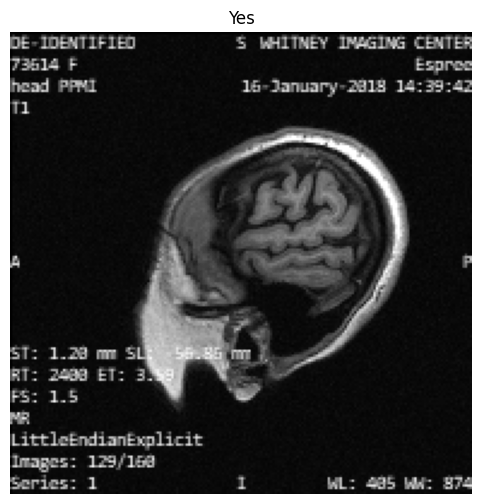

In [61]:
import cv2
import matplotlib.pyplot as plt

# Load a single image
img = cv2.imread('test/PD/img-00001-00129.jpg', 0)

if img is None:
    print("Error: Unable to load the image")
else:
    img_resized = cv2.resize(img, (200, 200))

    img_normalized = img_resized.reshape(1, -1) / 255

    prediction = sv.predict(img_normalized)

    predicted_label = dec[prediction[0]]

    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.title(predicted_label)
    plt.axis('off')
    plt.show()
    
    
# plt.figure(figsize=(12,8))
# p = os.listdir('test/')
# c=1
# for i in os.listdir('test/Control/')[:16]:
#     plt.subplot(4,4,c)
    
#     img = cv2.imread('test/Control/'+i,0)
#     img1 = cv2.resize(img, (200,200))
#     img1 = img1.reshape(1,-1)/255
#     p = sv.predict(img1)
#     plt.title(dec[p[0]])
#     plt.imshow(img, cmap='gray')
#     plt.axis('off')
#     c+=1    

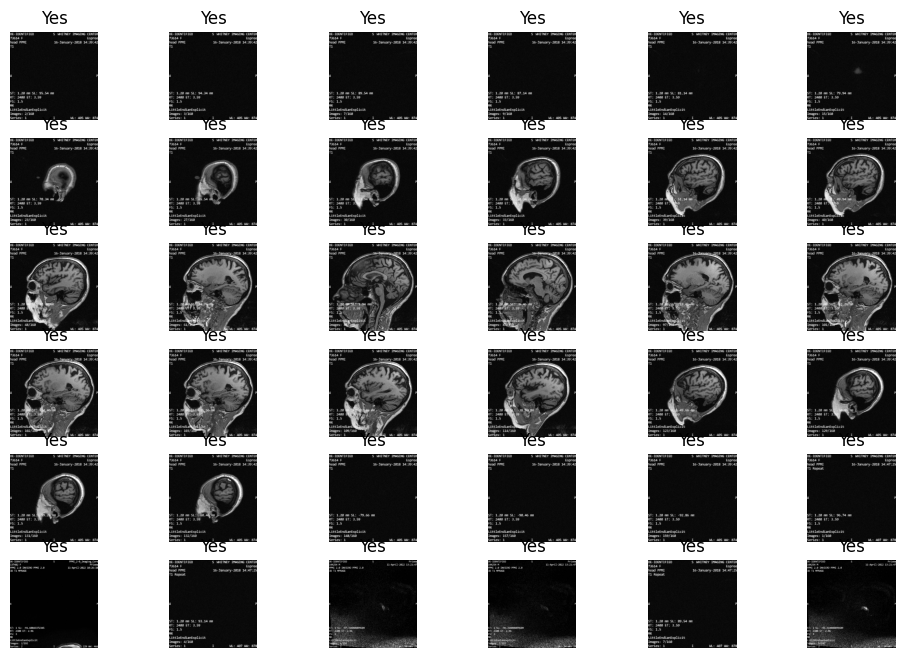

In [37]:
plt.figure(figsize=(12,8))
p = os.listdir('test/')
c=1
for i in os.listdir('test/PD/')[:36]:
    plt.subplot(6,6,c)
    
    img = cv2.imread('test/PD/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1